In [1]:
import cv2 as cv
import pytesseract
import matplotlib.pyplot as plt

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

In [150]:
def readFromImage (url: str):
    img = cv.imread(url)
    text = pytesseract.image_to_string(img, lang = 'eng')
    plt.imshow(img)
    plt.show()
    print('Tekst: ', text)

In [151]:
def readFromConvertedImage (url: str, formattingOption = 1):
    img = cv.imread(url, cv.IMREAD_GRAYSCALE)
    if formattingOption == 1:
        converted_img = cv.threshold(cv.GaussianBlur(img, (5, 5), 0), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)[1]
    
    elif formattingOption == 2:
        converted_img = cv.threshold(cv.bilateralFilter(img, 5, 75, 75), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)[1]
    
    elif formattingOption == 3:
        converted_img = cv.threshold(cv.medianBlur(img, 3), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)[1]
    
    elif formattingOption == 4:
        converted_img = cv.adaptiveThreshold(cv.GaussianBlur(img, (5, 5), 0), 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 31, 2)
    
    elif formattingOption == 5:
        converted_img = cv.adaptiveThreshold(cv.bilateralFilter(img, 9, 75, 75), 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 31, 2)
    
    elif formattingOption == 6:
        converted_img = cv.adaptiveThreshold(cv.medianBlur(img, 3), 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 31, 2)
    
    else: raise RuntimeError('Unsupported option')

    plt.imshow(converted_img)
    plt.show()
    text = pytesseract.image_to_string(converted_img, lang = 'eng')
    print('Tekst: ', text, '\nOpcja wygładzania: ', formattingOption)

In [160]:
img = 'img_3.png'

Rozpoznawanie znaków bez wygładzania

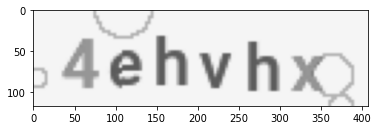

Tekst:  Aéhvhx



In [161]:
readFromImage(img)

Rozpoznawanie znaków z wygładzaniem

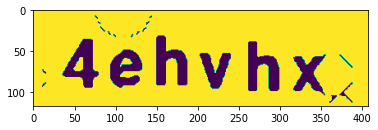

Tekst:  Aehvhx:
 
Opcja wygładzania:  1


In [162]:
readFromConvertedImage(img, 1)

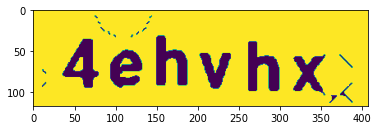

Tekst:  Aehvhx:
 
Opcja wygładzania:  2


In [163]:
readFromConvertedImage(img, 2)

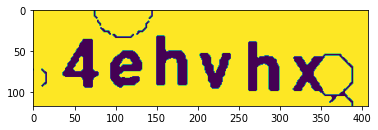

Tekst:  AéhV hx
 
Opcja wygładzania:  3


In [164]:
readFromConvertedImage(img, 3)

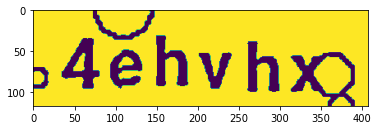

Tekst:  46éhvhx
 
Opcja wygładzania:  4


In [165]:
readFromConvertedImage(img, 4)

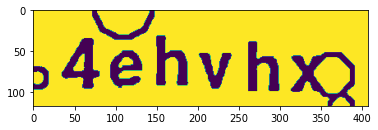

Tekst:  4ehv hx
 
Opcja wygładzania:  5


In [166]:
readFromConvertedImage(img, 5)

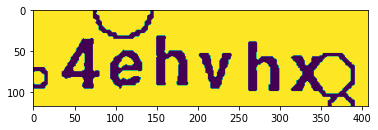

Tekst:  4ehy hx
 
Opcja wygładzania:  6


In [167]:
readFromConvertedImage(img, 6)